In [1]:
import pandas as pd
df=pd.read_csv('DiwaliSalesData.csv',encoding='unicode_escape') # for encoding error
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Cleaning

In [3]:
#checking null values
data1=df.isna().sum(axis=0)
data1

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [4]:
#converting the values into percentage or also called 'scaling'
data2=data1/len(df)*100
data2

User_ID               0.000000
Cust_name             0.000000
Product_ID            0.000000
Gender                0.000000
Age Group             0.000000
Age                   0.000000
Marital_Status        0.000000
State                 0.000000
Zone                  0.000000
Occupation            0.000000
Product_Category      0.000000
Orders                0.000000
Amount                0.106657
Status              100.000000
unnamed1            100.000000
dtype: float64

In [5]:
df.columns #listing column names

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [5]:
#deleting unwanted columns
df_dp=df.drop(['Status','unnamed1'],axis=1)
df_dp

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [6]:
df_dp.describe() #listing the statistics of the data

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [8]:
df_dp.shape

(11251, 13)

In [7]:
#checking the duplicate values
df_dp.duplicated().sum()

8

In [8]:
#deleting the duplicates
df_dp=df_dp.drop_duplicates()
df_dp.duplicated().sum()

0

In [9]:
#deleting the null values
df_dp=df_dp.dropna(axis=0)
df_dp.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df_dp.shape

(11231, 13)

# Data filtering and Visualization

In [10]:
#listing those data of 'Occupation' and 'Amount' columns that equals the max amount
df_oc = df_dp[df_dp['Amount'].max()==df_dp['Amount']][['Occupation','Amount']]
df_oc

,Occupation,Amount
0,Healthcare,23952.0


In [14]:
#counting the total numbe of unique entities inside a column
Gender_df = df_dp['Gender'].value_counts()
Gender_df

Gender
F    7828
M    3403
Name: count, dtype: int64

# Visualization

In [15]:
#importing libraries for plotting or 'visualization'
import matplotlib.pyplot as plt
import seaborn as sb

### Countplot
- mainly for categorical data

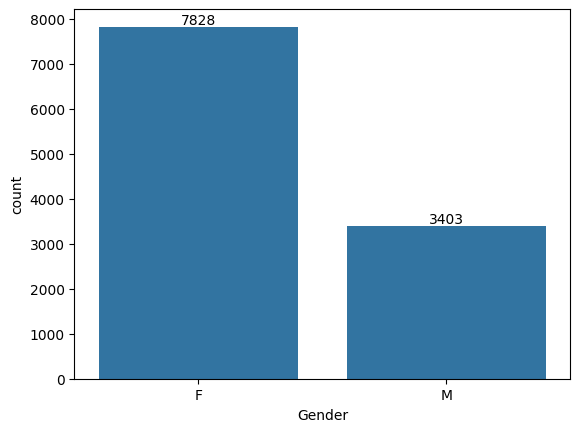

In [16]:
x=df_dp['Gender']
ax=sb.countplot(x=x,data=df_dp)
for bars in ax.containers: # to display the no above the bars
    ax.bar_label(bars)

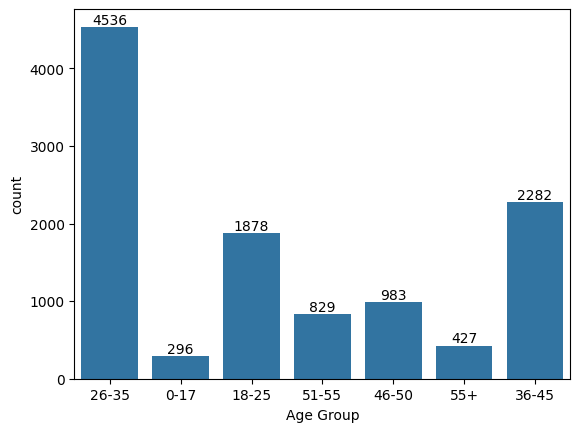

In [17]:
age_grp=sb.countplot(x='Age Group', data=df_dp)
for bars in age_grp.containers:
    age_grp.bar_label(bars)

In [18]:
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marital_Status    11231 non-null  int64  
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [19]:
df_dp.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [20]:
df_dp[['Amount','Occupation']].isna().sum()
df_dp['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

- find unique values

In [21]:
df_dp['Occupation'].nunique()
df_dp['State'].nunique()

16

### Groupby Method

In [22]:
df_dp.groupby('Occupation')[['Amount']].nunique()
df_dp.groupby('Occupation')[['Amount']].sum()


,Amount
Occupation,
Agriculture,2584999.00
Automobile,5368596.00
Aviation,12599994.00
Banking,10770610.95
Chemical,5297436.00
Construction,3589588.00
Food Processing,4070670.00
Govt,8517212.00
Healthcare,13034587.49


In [23]:
df_dp.groupby('Occupation').describe()[['Amount']]

Amount                                                    \
                  count         mean          std    min      25%     50%   
Occupation                                                                  
Agriculture       282.0  9166.663121  5147.201121  206.0  5382.50  8049.5   
Automobile        565.0  9501.939823  5277.975829  697.0  5444.00  8281.0   
Aviation         1309.0  9625.663866  5356.125992  381.0  5470.00  8118.0   
Banking          1137.0  9472.832850  5040.278930  567.0  5993.00  8095.0   
Chemical          541.0  9791.933457  5442.793369  370.0  5913.00  8383.0   
Construction      413.0  8691.496368  5195.333164  700.0  5280.00  7761.0   
Food Processing   423.0  9623.333333  5163.212452  773.0  6026.00  8096.0   
Govt              854.0  9973.316159  5358.375524  580.0  5936.75  8638.0   
Healthcare       1408.0  9257.519524  5123.215266  188.0  5406.50  8085.5   
Hospitality       700.0  9053.761429  4872.545623  384.0  5383.50  8079.0   
IT Sector        1581.0  9324.390892  5269.050460  396.0  5326.00  8076.0   
Lawyer            531.0  9381.666667  5205.215180  570.0  5323.50  8135.0   
Media             637.0  9883.568273  5311.447455  557.0  5955.00  8646.0   
Retail            501.0  9547.245509  5320.588282  591.0  5427.00  8081.0   
Textile           349.0  9183.300860  5086.880798  213.0  5401.00  7945.0   

                                     
                      75%       max  
Occupation                           
Agriculture      12356.75  23160.00  
Automobile       12296.00  23924.00  
Aviation         13120.00  23619.00  
Banking          12214.00  23770.00  
Chemical         15218.00  20955.00  
Construction     11933.00  23912.00  
Food Processing  12334.50  23877.00  
Govt             15169.75  23934.00  
Healthcare       12281.25  23952.00  
Hospitality      12033.00  23568.00  
IT Sector        12578.00  23730.00  
Lawyer           12806.50  23841.00  
Media            14063.00  23799.99  
Retail           13481.00  23752.00  
Textile          12090.00  21547.00

In [24]:
list(df_dp.groupby('Occupation')['Amount'])

[('Agriculture',
  45       23160.0
  56       21463.0
  61       21388.0
  103      20914.0
  294      20380.0
            ...   
  11221      575.0
  11225      572.0
  11233      563.0
  11236      560.0
  11249      206.0
  Name: Amount, Length: 282, dtype: float64),
 ('Automobile',
  2        23924.0
  13       23718.0
  23       23515.0
  24       23513.0
  32       23314.0
            ...   
  11065     1407.0
  11081     1381.0
  11125      931.0
  11199      740.0
  11207      697.0
  Name: Amount, Length: 565, dtype: float64),
 ('Aviation',
  17       23619.0
  29       23389.0
  30       23365.0
  37       23270.0
  40       23247.0
            ...   
  11223      574.0
  11224      572.0
  11228      569.0
  11234      562.0
  11245      381.0
  Name: Amount, Length: 1309, dtype: float64),
 ('Banking',
  10       23770.0
  21       23525.0
  26       23456.0
  27       23451.0
  39       23252.0
            ...   
  11171      760.0
  11173      759.0
  11178      750.0
  1

In [25]:
df_amt_occ_ma = (df_dp.groupby('Occupation')[['Amount']].max())
df_amt_occ_ma

,Amount
Occupation,
Agriculture,23160.00
Automobile,23924.00
Aviation,23619.00
Banking,23770.00
Chemical,20955.00
Construction,23912.00
Food Processing,23877.00
Govt,23934.00
Healthcare,23952.00


In [26]:
df_amt_occ_max = (df_dp.groupby('Occupation')[['Amount']].max()).max()
df_amt_occ_max

Amount    23952.0
dtype: float64

In [27]:
d=df_dp[df_dp['Amount']==23952][['Amount','Occupation']]
d

,Amount,Occupation
0,23952.0,Healthcare


In [28]:
#next step doing the same thing as above
df_max_amt = df_dp['Amount'].max()
df_dp[df_dp['Amount']==df_max_amt][['Amount','Occupation']]

,Amount,Occupation
0,23952.0,Healthcare


In [29]:
df_max_amt = df_dp['Amount'].max()
de=df_dp.groupby(df_dp['Amount']==df_max_amt)[['Amount','Occupation']]
list(de)

[(False,
          Amount       Occupation
  1      23934.0             Govt
  2      23924.0       Automobile
  3      23912.0     Construction
  4      23877.0  Food Processing
  5      23877.0  Food Processing
  ...        ...              ...
  11246    370.0         Chemical
  11247    367.0       Healthcare
  11248    213.0          Textile
  11249    206.0      Agriculture
  11250    188.0       Healthcare
  
  [11230 rows x 2 columns]),
 (True,
      Amount  Occupation
  0  23952.0  Healthcare)]

In [30]:
df_dp.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [31]:
df_occ_mar_0 = df_dp[df_dp['Marital_Status']==0][['Occupation']].value_counts()
df_occ_mar_0

Occupation     
Healthcare         1014
IT Sector           864
Aviation            727
Banking             570
Govt                488
Retail              381
Hospitality         358
Media               345
Automobile          309
Chemical            301
Construction        290
Lawyer              272
Food Processing     229
Textile             215
Agriculture         151
Name: count, dtype: int64

In [32]:
df_occ_mar_1 = df_dp[df_dp['Marital_Status']==1][['Occupation']].value_counts()
df_occ_mar_1

Occupation     
IT Sector          717
Aviation           582
Banking            567
Healthcare         394
Govt               366
Hospitality        342
Media              292
Lawyer             259
Automobile         256
Chemical           240
Food Processing    194
Textile            134
Agriculture        131
Construction       123
Retail             120
Name: count, dtype: int64

In [33]:
df_dp.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [34]:
df_dp.groupby('Age Group').nunique()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
Age Group,,,,,,,,,,,,
0-17,132,129,253,2,6,2,16,5,15,16,4,287
18-25,652,545,1016,2,8,2,16,5,15,18,4,1625
26-35,1386,949,1717,2,10,2,16,5,15,18,4,3511
36-45,751,615,1215,2,11,2,16,5,15,18,4,1980
46-50,328,303,701,2,5,2,16,5,15,17,4,908
51-55,300,278,620,2,5,2,16,5,15,18,4,770
55+,203,189,352,2,37,2,15,5,15,18,4,413


In [35]:
df_dp.groupby('Age Group').max()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
Age Group,,,,,,,,,,,,
0-17,1006006,Zypern,P0099742,M,17,1,Uttarakhand,Western,Textile,Veterinary,4,23912.0
18-25,1006028,percer,P0099342,M,25,1,Uttarakhand,Western,Textile,Veterinary,4,23841.0
26-35,1006040,liebe,P0099442,M,35,1,Uttarakhand,Western,Textile,Veterinary,4,23952.0
36-45,1006011,percer,P0099442,M,45,1,Uttarakhand,Western,Textile,Veterinary,4,23456.0
46-50,1006039,Zic,P0099042,M,50,1,Uttarakhand,Western,Textile,Veterinary,4,23525.0
51-55,1006033,Zydlo,P0099342,M,55,1,Uttarakhand,Western,Textile,Veterinary,4,23568.0
55+,1005986,percer,P0097242,M,92,1,Uttarakhand,Western,Textile,Veterinary,4,23513.0


In [36]:
df_dp.groupby('Age Group').max() #likwise we can count or sum

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
Age Group,,,,,,,,,,,,
0-17,1006006,Zypern,P0099742,M,17,1,Uttarakhand,Western,Textile,Veterinary,4,23912.0
18-25,1006028,percer,P0099342,M,25,1,Uttarakhand,Western,Textile,Veterinary,4,23841.0
26-35,1006040,liebe,P0099442,M,35,1,Uttarakhand,Western,Textile,Veterinary,4,23952.0
36-45,1006011,percer,P0099442,M,45,1,Uttarakhand,Western,Textile,Veterinary,4,23456.0
46-50,1006039,Zic,P0099042,M,50,1,Uttarakhand,Western,Textile,Veterinary,4,23525.0
51-55,1006033,Zydlo,P0099342,M,55,1,Uttarakhand,Western,Textile,Veterinary,4,23568.0
55+,1005986,percer,P0097242,M,92,1,Uttarakhand,Western,Textile,Veterinary,4,23513.0


In [37]:
df_dp.groupby('Age Group').agg({
    'Amount':['mean','max','min','sum']
}
    
)

Amount                             
                  mean      max    min          sum
Age Group                                          
0-17       9120.449324  23912.0  396.0   2699653.00
18-25      9177.598509  23841.0  188.0  17235530.00
26-35      9387.515198  23952.0  367.0  42581768.94
36-45      9699.884527  23456.0  206.0  22135136.49
46-50      9367.084435  23525.0  569.0   9207844.00
51-55      9937.164053  23568.0  382.0   8237909.00
55+        9557.346604  23513.0  568.0   4080987.00

In [38]:
df_dp.groupby(['Age Group','Gender']).agg({
    'Amount':['mean','max','min','sum'],
    'Age':['mean','max','min','sum']
}
    
)

Amount                                     Age      \
                          mean      max    min          sum       mean max   
Age Group Gender                                                             
0-17      F        8897.586420  20205.0  396.0   1441409.00  14.450617  17   
          M        9389.880597  23912.0  560.0   1258244.00  14.634328  17   
18-25     F        9108.814559  23841.0  188.0  11887003.00  21.517241  25   
          M        9334.253054  23281.0  370.0   5348527.00  21.431065  25   
26-35     F        9475.088775  23952.0  381.0  30945639.94  30.484385  35   
          M        9162.306299  23877.0  367.0  11636129.00  30.351969  35   
36-45     F        9828.851294  23456.0  213.0  15500098.49  40.553583  45   
          M        9411.401418  23160.0  206.0   6635038.00  40.167376  45   
46-50     F        9730.725830  23525.0  569.0   6743393.00  47.966811  50   
          M        8498.106897  21178.0  580.0   2464451.00  48.182759  50   
51-55     F        9738.169982  23515.0  570.0   5385208.00  53.005425  55   
          M       10335.873188  23568.0  382.0   2852701.00  52.981884  55   
55+       F        8841.658088  20533.0  568.0   2404931.00  73.705882  92   
          M       10813.264516  23513.0  744.0   1676056.00  74.019355  92   

                             
                 min    sum  
Age Group Gender             
0-17      F       12   2341  
          M       12   1961  
18-25     F       18  28080  
          M       18  12280  
26-35     F       26  99562  
          M       26  38547  
36-45     F       36  63953  
          M       26  28318  
46-50     F       46  33241  
          M       46  13973  
51-55     F       51  29312  
          M       51  14623  
55+       F       56  20048  
          M       56  11473

In [39]:
df_dp.groupby(['Age Group','Gender']).describe()

User_ID                                                   \
                   count          mean          std        min        25%   
Age Group Gender                                                            
0-17      F        162.0  1.002546e+06  1774.787224  1000001.0  1001205.0   
          M        134.0  1.002781e+06  1827.761580  1000019.0  1001365.0   
18-25     F       1305.0  1.002811e+06  1710.829465  1000022.0  1001414.0   
          M        573.0  1.002854e+06  1723.768662  1000018.0  1001347.0   
26-35     F       3266.0  1.003087e+06  1689.669561  1000003.0  1001632.0   
          M       1270.0  1.003154e+06  1781.997696  1000024.0  1001489.5   
36-45     F       1577.0  1.002927e+06  1650.022984  1000007.0  1001441.0   
          M        705.0  1.003078e+06  1747.943373  1000010.0  1001592.0   
46-50     F        693.0  1.002999e+06  1793.238761  1000004.0  1001415.0   
          M        290.0  1.003149e+06  1841.772166  1000033.0  1001603.0   
51-55     F        553.0  1.003041e+06  1648.273710  1000017.0  1001591.0   
          M        276.0  1.002994e+06  1726.603391  1000017.0  1001465.0   
55+       F        272.0  1.003009e+06  1604.870869  1000002.0  1001896.0   
          M        155.0  1.002945e+06  1637.939975  1000089.0  1002009.0   

                                                       Age             ...  \
                        50%         75%        max   count       mean  ...   
Age Group Gender                                                       ...   
0-17      F       1002033.0  1004126.75  1006006.0   162.0  14.450617  ...   
          M       1002149.5  1004669.00  1006006.0   134.0  14.634328  ...   
18-25     F       1002894.0  1004041.00  1006028.0  1305.0  21.517241  ...   
          M       1002926.0  1004387.00  1005964.0   573.0  21.431065  ...   
26-35     F       1003267.5  1004449.75  1006040.0  3266.0  30.484385  ...   
          M       1003154.0  1004747.50  1006036.0  1270.0  30.351969  ...   
36-45     F       1002946.0  1004289.00  1006011.0  1577.0  40.553583  ...   
          M       1003025.0  1004673.00  1005994.0   705.0  40.167376  ...   
46-50     F       1002849.0  1004510.00  1006032.0   693.0  47.966811  ...   
          M       1003483.0  1004472.00  1006039.0   290.0  48.182759  ...   
51-55     F       1003365.0  1004369.00  1006033.0   553.0  53.005425  ...   
          M       1002990.5  1004418.00  1005926.0   276.0  52.981884  ...   
55+       F       1002676.0  1004171.00  1005980.0   272.0  73.705882  ...   
          M       1002535.0  1004171.00  1005986.0   155.0  74.019355  ...   

                 Orders       Amount                                    \
                    75%  max   count          mean          std    min   
Age Group Gender                                                         
0-17      F         3.0  4.0   162.0   8897.586420  4848.209314  396.0   
          M         3.0  4.0   134.0   9389.880597  5167.150501  560.0   
18-25     F         3.0  4.0  1305.0   9108.814559  5177.919931  188.0   
          M         3.0  4.0   573.0   9334.253054  5143.614685  370.0   
26-35     F         3.0  4.0  3266.0   9475.088775  5283.455713  381.0   
          M         4.0  4.0  1270.0   9162.306299  5165.905603  367.0   
36-45     F         3.0  4.0  1577.0   9828.851294  5203.373194  213.0   
          M         4.0  4.0   705.0   9411.401418  5395.806761  206.0   
46-50     F         3.0  4.0   693.0   9730.725830  5057.099604  569.0   
          M         3.0  4.0   290.0   8498.106897  5118.177437  580.0   
51-55     F         4.0  4.0   553.0   9738.169982  5055.138948  570.0   
          M         3.0  4.0   276.0  10335.873188  5523.153917  382.0   
55+       F         4.0  4.0   272.0   8841.658088  4973.202787  568.0   
          M         3.0  4.0   155.0  10813.264516  5477.042578  744.0   

                                                       
                      25%      50%       75%      max  
Age Group

In [71]:
df_s_p_a = df_dp.groupby(['State','Product_Category'])['Amount'].sum().reset_index()
df_s_p_a.sort_values(by='Amount', ascending=False)

,State,Product_Category,Amount
214,Uttar Pradesh,Food,7983142.00
161,Maharashtra,Food,6421531.00
37,Delhi,Footwear & Shoes,5027449.45
114,Karnataka,Footwear & Shoes,4963928.00
113,Karnataka,Food,3995458.00
...,...,...,...
137,Kerala,Veterinary,1075.00
58,Gujarat,Office,967.00
183,Punjab,Office,960.00
205,Telangana,Office,777.00


In [40]:
df_s_g_a = df_dp.groupby(['State','Gender'])['Amount'].sum().reset_index()
print(df_s_g_a)

               State Gender       Amount
0     Andhra Pradesh      F   5511219.99
1     Andhra Pradesh      M   2525927.00
2              Bihar      F   2811193.00
3              Bihar      M   1203476.00
4              Delhi      F   8264499.45
5              Delhi      M   3339320.00
6            Gujarat      F   2824339.00
7            Gujarat      M   1113820.00
8            Haryana      F   3195992.00
9            Haryana      M   1021879.00
10  Himachal Pradesh      F   3163299.00
11  Himachal Pradesh      M   1800069.00
12         Jharkhand      F   1954275.00
13         Jharkhand      M   1072181.00
14         Karnataka      F   9933966.00
15         Karnataka      M   3589574.00
16            Kerala      F   2644087.99
17            Kerala      M   1250404.00
18    Madhya Pradesh      F   5301046.00
19    Madhya Pradesh      M   2800096.00
20       Maharashtra      F  10551117.00
21       Maharashtra      M   3853350.00
22            Punjab      F    950267.00
23            Pu

### Barplot
- for continuous data

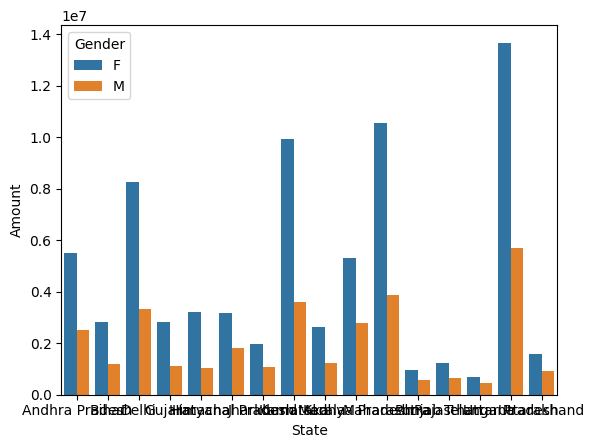

In [44]:
plt = sb.barplot(x='State', y='Amount', hue='Gender', data=df_s_g_a)

TypeError: 'Figure' object is not callable

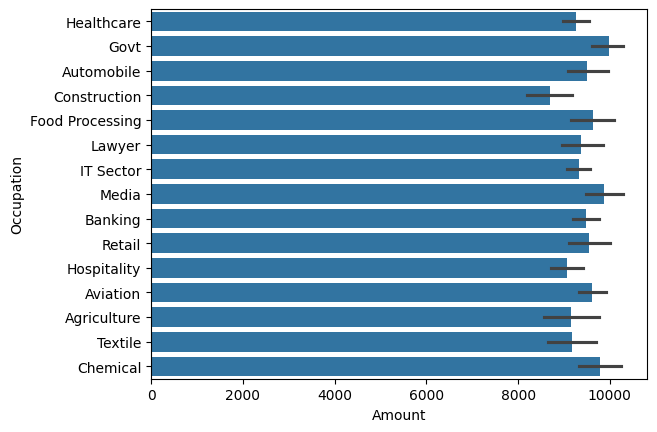

In [46]:

pl = sb.barplot(data=df, y='Occupation', x='Amount')
pl.figure(figsize=(8,6))

In [48]:
df_dp.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [55]:
# How many products of each category are purchased by different age groups?
df_a_p_o = df_dp.groupby(['Age Group', 'Product_Category','State'])['Orders'].size().unstack(fill_value=0) # size le no of occurance, unstack le reset garxa data frame lai
df_a_p_o

State                         Andhra Pradesh  Bihar  Delhi  Gujarat  Haryana  \
Age Group Product_Category                                                     
0-17      Auto                             2      0      0        0        0   
          Beauty                           0      0      0        0        0   
          Books                            0      0      0        0        0   
          Clothing & Apparel               4      3      4        4        4   
          Decor                            0      0      0        0        0   
...                                      ...    ...    ...      ...      ...   
55+       Pet Care                         1      0      2        0        0   
          Sports Products                  0      0      1        1        1   
          Stationery                       0      0      2        0        0   
          Tupperware                       0      0      0        0        0   
          Veterinary                       0      0      0        0        0   

State                         Himachal Pradesh  Jharkhand  Karnataka  Kerala  \
Age Group Product_Category                                                     
0-17      Auto                               0          0          1       0   
          Beauty                             1          0          1       0   
          Books                              0          0          0       0   
          Clothing & Apparel                 7          4          9       8   
          Decor                              0          0          0       0   
...                                        ...        ...        ...     ...   
55+       Pet Care                           1          0          0       0   
          Sports Products                    3          0          1       0   
          Stationery                         0          0          0       0   
          Tupperware                         0          0          0       0   
          Veterinary                         0          0          0       0   

State                         Madhya Pradesh  Maharashtra  Punjab  Rajasthan  \
Age Group Product_Category                                                     
0-17      Auto                             0            0       0          0   
          Beauty                           5            0       0          0   
          Books                            0            1       0          0   
          Clothing & Apparel               4            5       1          0   
          Decor                            0            0       0          0   
...                                      ...          ...     ...        ...   
55+       Pet Care                         0            0       0          0   
          Sports Products                  0            1       0          0   
          Stationery                       0            0       0          0   
          Tupperware                       0            1       0          0   
          Veterinary                       1            1       0          0   

State                         Telangana  Uttar Pradesh  Uttarakhand  
Age Group Product_Category                                           
0-17      Auto                        0              0            0  
          Beauty                      0              2            0  
          Books                       0              0            0  
          Clothing & Apparel          0             12            3  
          Decor                       0              1            0  
...                                 ...            ...          ...  
55+       Pet Care                    0              1            1  
          Sports Products             0              2            0  
          Stationery                  0              0            0  
          Tupperware                  0              0            0  
          Veterinary                 

In [59]:
# How many products of each category are purchased by different age groups?
df_a_p_o = df_dp.groupby([df_dp['Age Group']=='0-17', 'Product_Category'])['Orders'].sum() # size le no of occurance, unstack le reset garxa data frame lai
df_a_p_o

Age Group  Product_Category     
False      Auto                      230
           Beauty                   1065
           Books                     242
           Clothing & Apparel       6458
           Decor                     233
           Electronics & Gadgets    5066
           Food                     5925
           Footwear & Shoes         2630
           Furniture                 860
           Games & Toys              911
           Hand & Power Tools         80
           Household items          1291
           Office                    250
           Pet Care                  532
           Sports Products           847
           Stationery                274
           Tupperware                166
           Veterinary                205
True       Auto                        8
           Beauty                     21
           Books                       3
           Clothing & Apparel        169
           Decor                       2
           Electronics &